# Add 30% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_a = outliers_utils.outliers_replace(df, 'age', 30)

Outliers found:


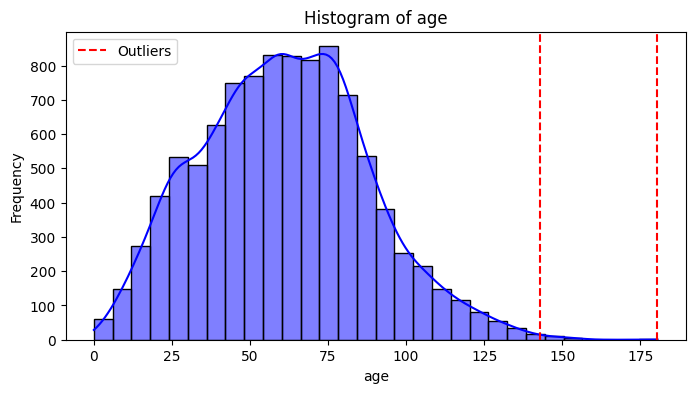

In [5]:
outliers_utils.visualize_outliers_specific(df_a, 'age')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3468
           1       0.95      0.99      0.97      3520

    accuracy                           0.97      6988
   macro avg       0.97      0.97      0.97      6988
weighted avg       0.97      0.97      0.97      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1527
           1       0.92      0.99      0.95      1469

    accuracy                           0.95      2996
   macro avg       0.95      0.95      0.95      2996
weighted avg       0.96      0.95      0.95      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4999
           1       0.94      0.99      0.96      4985

    accuracy                           0.96      9984


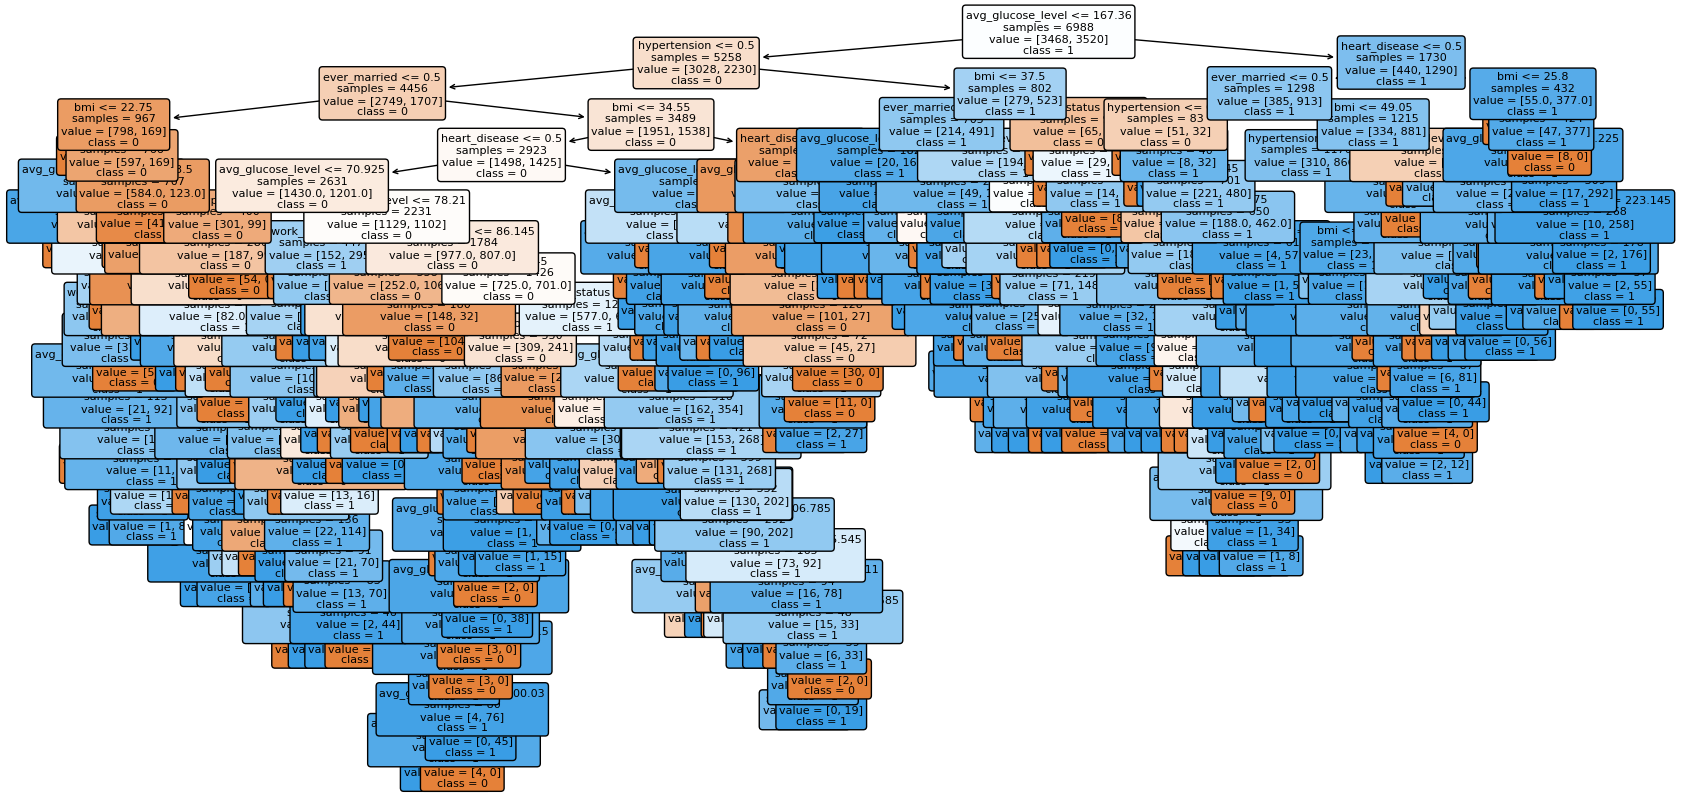

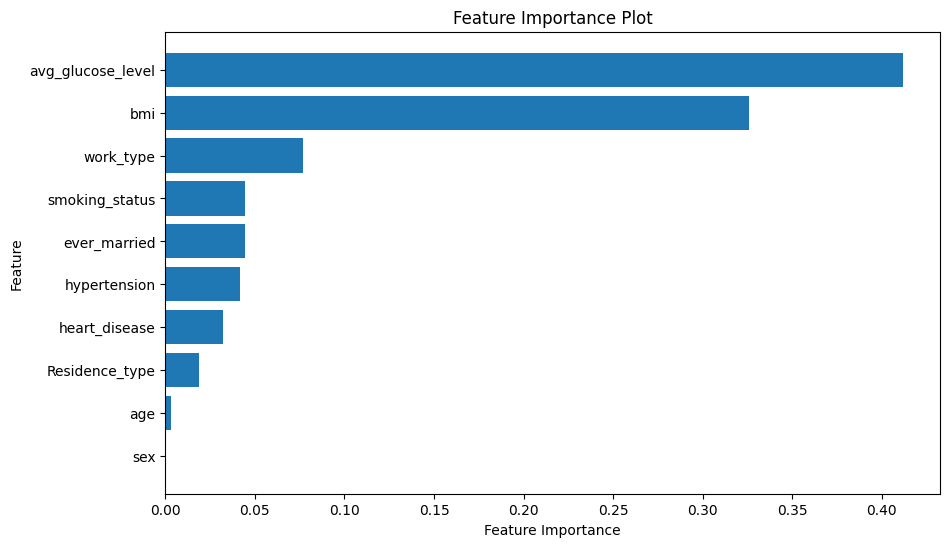

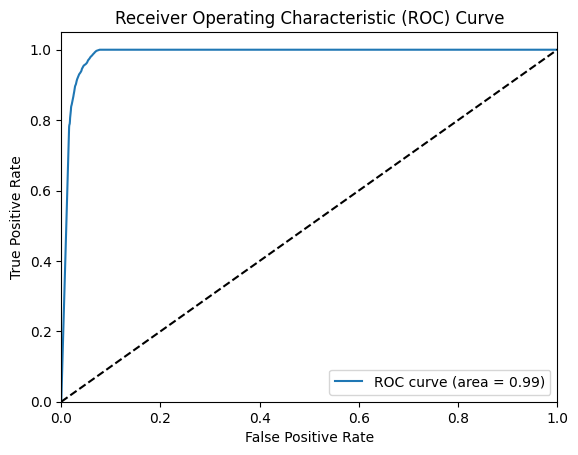

AUC Score: 0.9866394141416047


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.932761087267525, 0.949928469241774, 0.9556509298998569, 0.9527896995708155, 0.9456366237482118, 0.9341917024320457, 0.9427753934191703, 0.9370529327610873, 0.9555873925501432, 0.9398280802292264]
Mean accuracy: 0.9446202311119857
95% confidence interval: (0.9384437583604801, 0.9507967038634912)


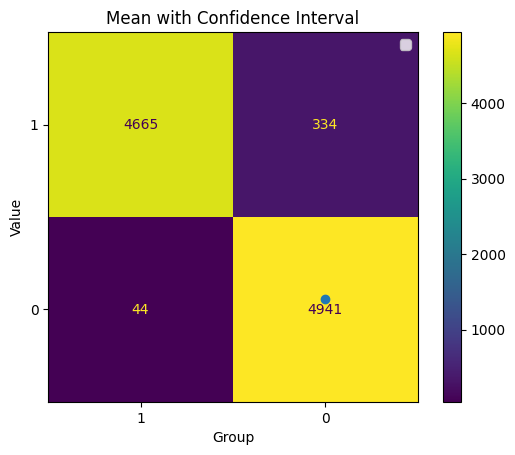

In [6]:
decision_tree = ML_algorithms.train_decision_tree_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_a)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 51.04033851623535
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 439, 'min_samples_leaf': 10}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      3520

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1527
           1       0.97      1.00      0.98      1469

    accuracy                           0.98      2996
   macro avg       0.98      0.98      0.98      2996
weighted avg       0.98      0.98      0.98      2996


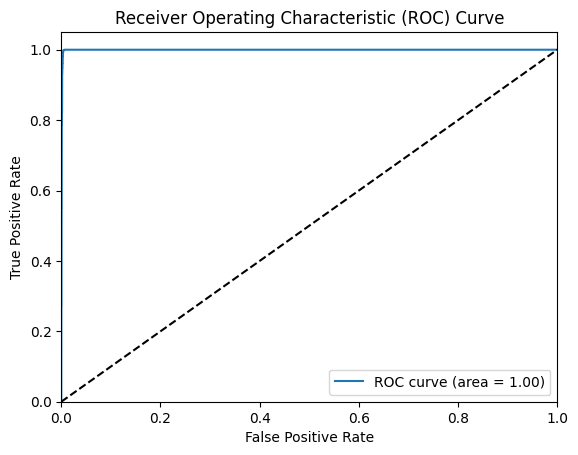

AUC Score: 0.999180337572028


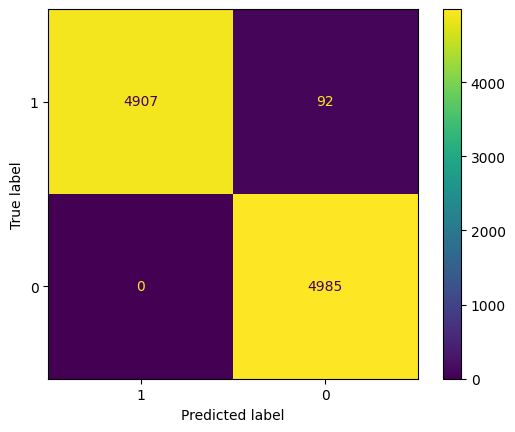

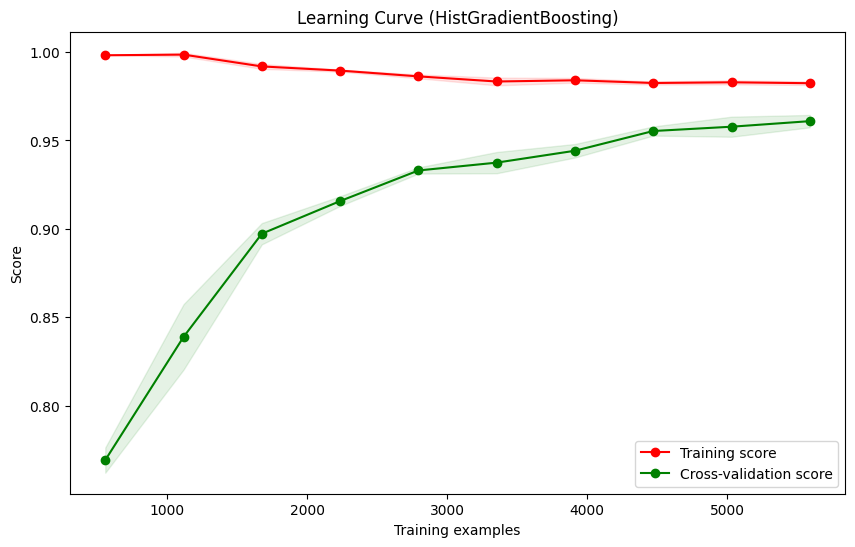

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9856938483547926, 0.9885550786838341, 0.977110157367668, 0.9885550786838341, 0.9814020028612304, 0.9756795422031473, 0.9842632331902719, 0.9785407725321889, 0.9756446991404012, 0.9828080229226361]
Mean accuracy: 0.9818252435940005
95% confidence interval: (0.9782753878422157, 0.9853750993457853)


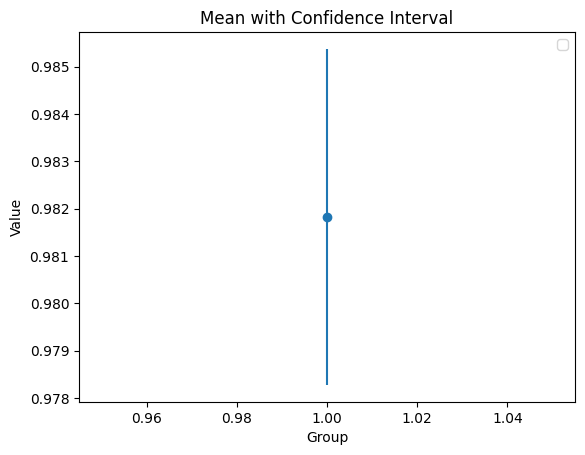

--------------------------------------


In [7]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_a)

print('--------------------------------------')

## avg_glucose_level

In [8]:
df = df_original.copy()

In [9]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [10]:
df_g = outliers_utils.outliers_replace(df, 'avg_glucose_level', 30)

Outliers found:


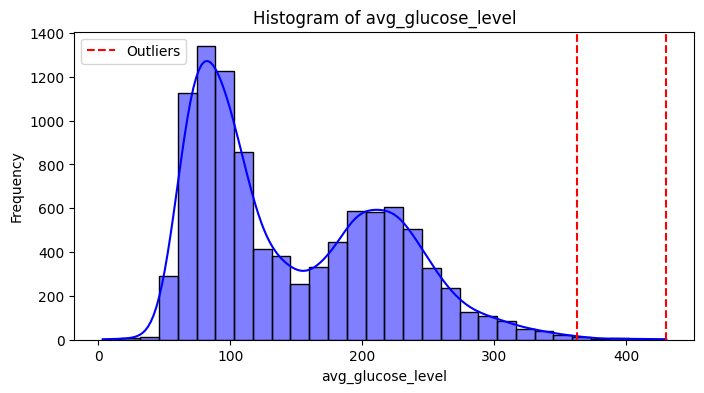

In [11]:
outliers_utils.visualize_outliers_specific(df_g, 'avg_glucose_level')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3482
           1       0.92      0.92      0.92      3506

    accuracy                           0.92      6988
   macro avg       0.92      0.92      0.92      6988
weighted avg       0.92      0.92      0.92      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1523
           1       0.85      0.87      0.86      1473

    accuracy                           0.86      2996
   macro avg       0.86      0.86      0.86      2996
weighted avg       0.86      0.86      0.86      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      4999
           1       0.89      0.94      0.92      4985

    accuracy                           0.91      9984


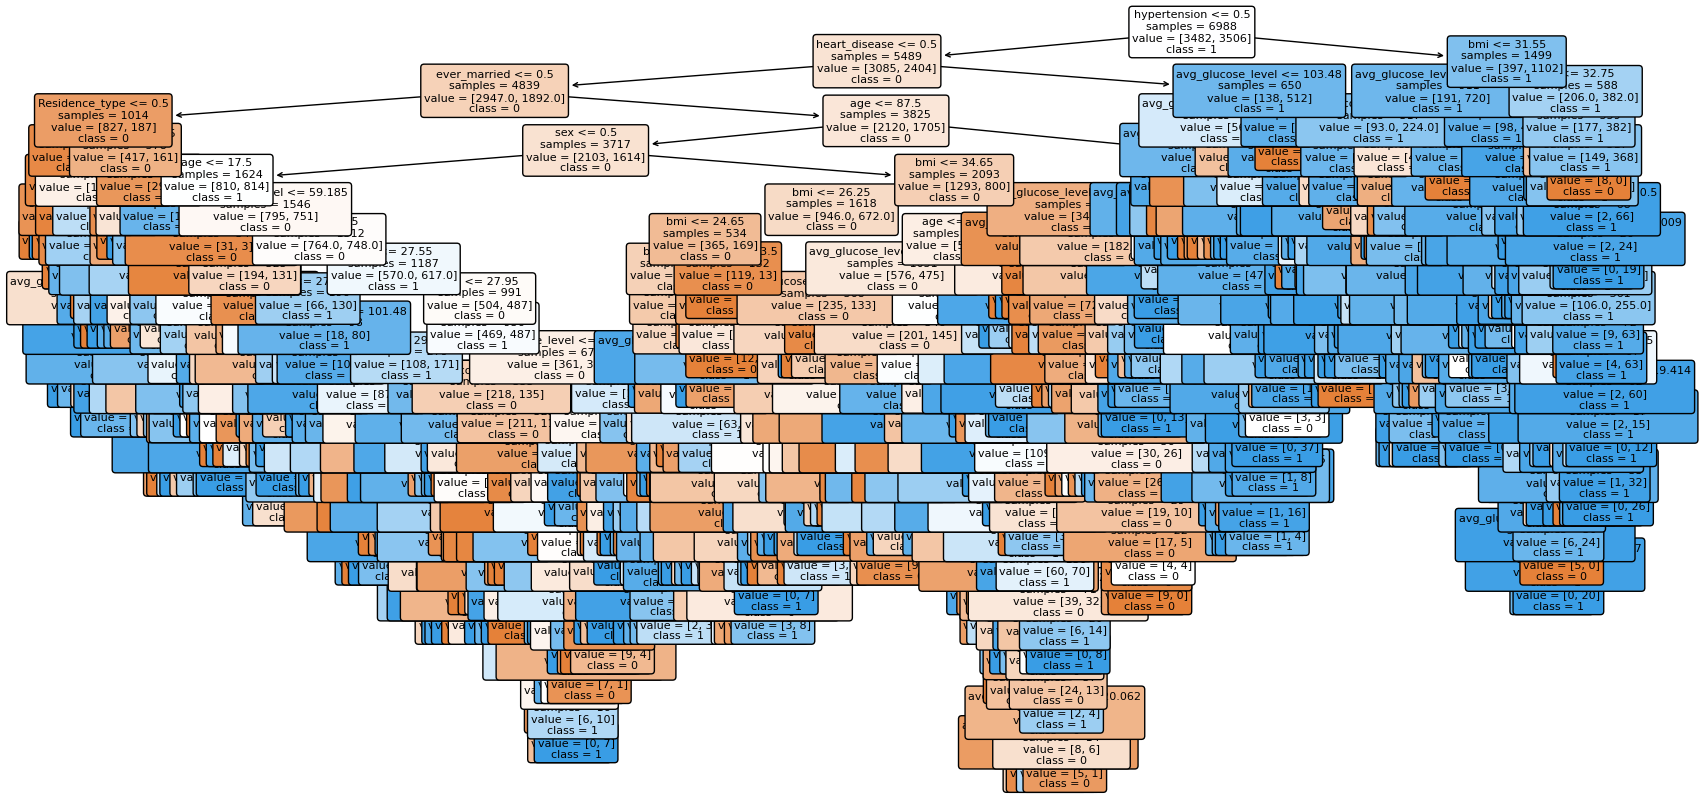

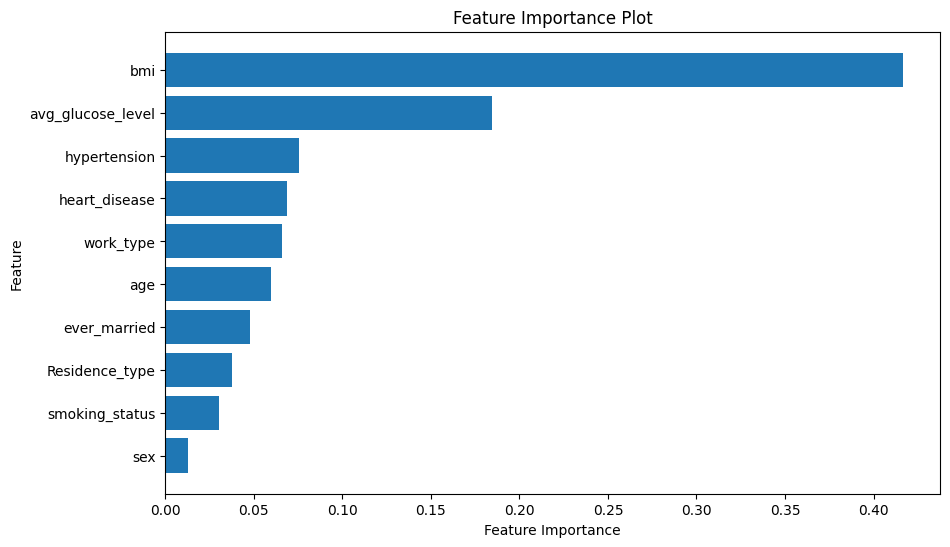

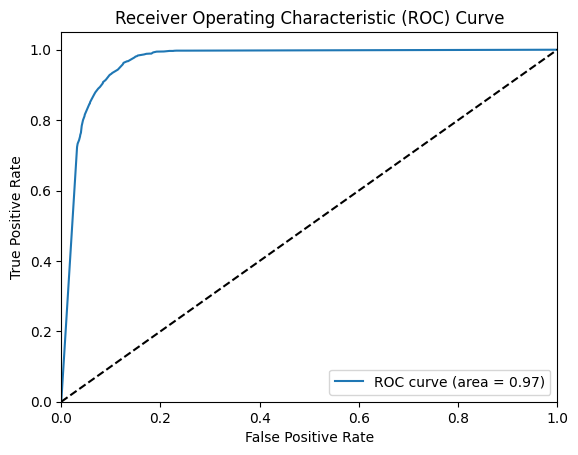

AUC Score: 0.9660883631089308


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8326180257510729, 0.8369098712446352, 0.8226037195994278, 0.8426323319027181, 0.844062947067239, 0.8197424892703863, 0.8655221745350501, 0.8125894134477826, 0.8538681948424068, 0.8223495702005731]
Mean accuracy: 0.8352898737861292
95% confidence interval: (0.8234025787632042, 0.8471771688090541)


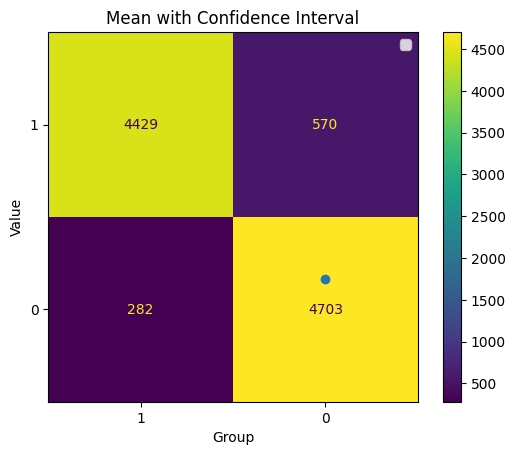

In [12]:
decision_tree = ML_algorithms.train_decision_tree_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_g)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 51.933658599853516
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.2, 'max_depth': 8, 'max_iter': 292, 'min_samples_leaf': 8}
Best score on training data:  0.9612104807539901
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3482
           1       1.00      1.00      1.00      3506

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1523
           1       0.94      0.96      0.95      1473

    accuracy                           0.95      2996
   macro avg       0.95      0.95      0.95      2996
weighted avg       0.95      0.95      

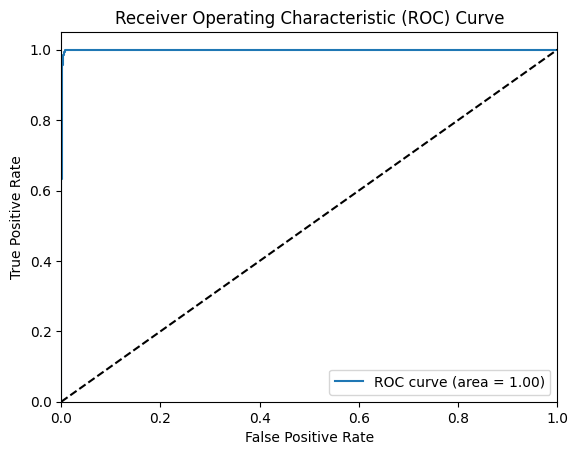

AUC Score: 0.9994023679359744


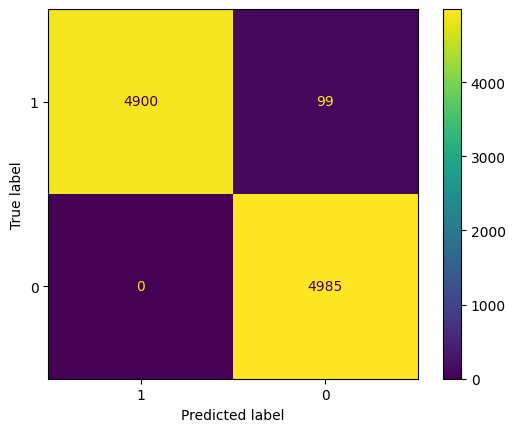

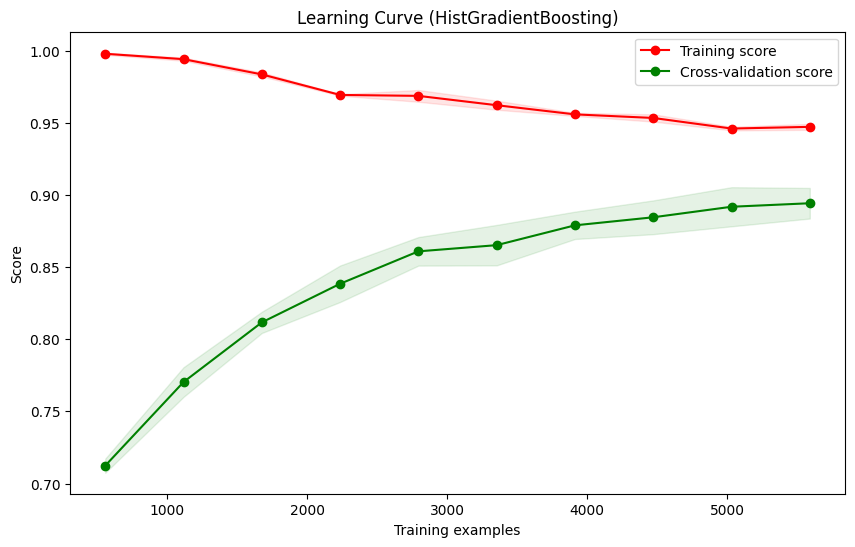

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9427753934191703, 0.9341917024320457, 0.9542203147353362, 0.9213161659513591, 0.9570815450643777, 0.9613733905579399, 0.9484978540772532, 0.944206008583691, 0.9541547277936963, 0.9455587392550143]
Mean accuracy: 0.9463375841869883
95% confidence interval: (0.9378705013986994, 0.9548046669752772)


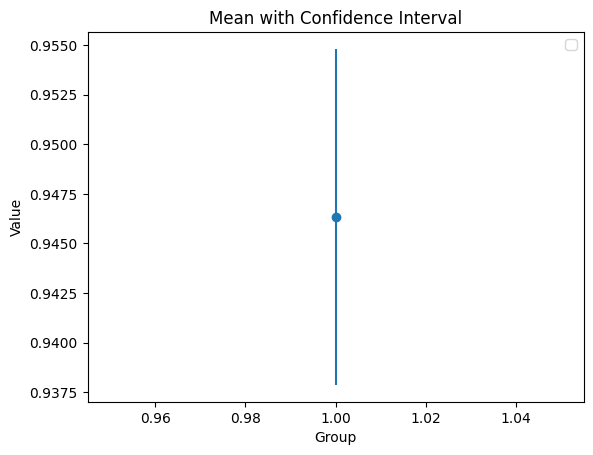

--------------------------------------


In [13]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_g)

print('--------------------------------------')

## bmi

In [14]:
df = df_original.copy()

--------------------------------------
Outliers found:


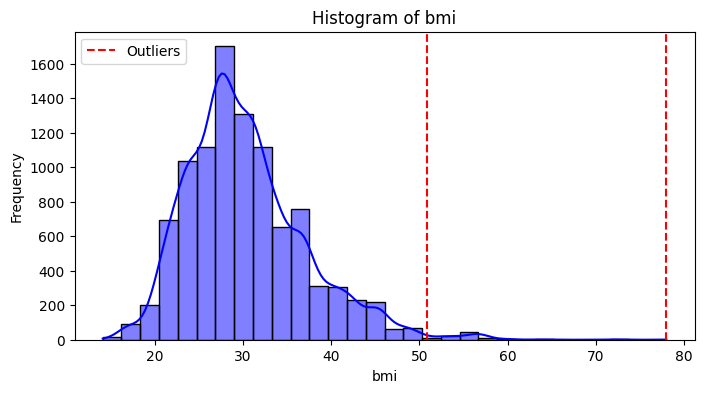

In [15]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [16]:
df_b = outliers_utils.outliers_replace(df, 'bmi', 30)

Outliers found:


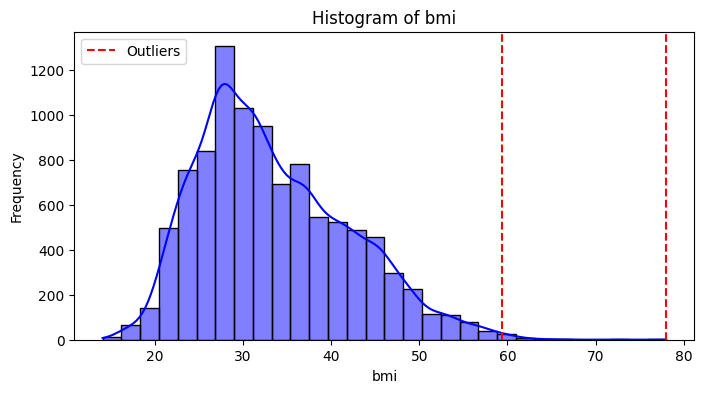

In [17]:
outliers_utils.visualize_outliers_specific(df_b, 'bmi')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3484
           1       0.94      0.95      0.94      3504

    accuracy                           0.94      6988
   macro avg       0.94      0.94      0.94      6988
weighted avg       0.94      0.94      0.94      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1510
           1       0.86      0.88      0.87      1486

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4999
           1       0.90      0.97      0.93      4985

    accuracy                           0.93      9984


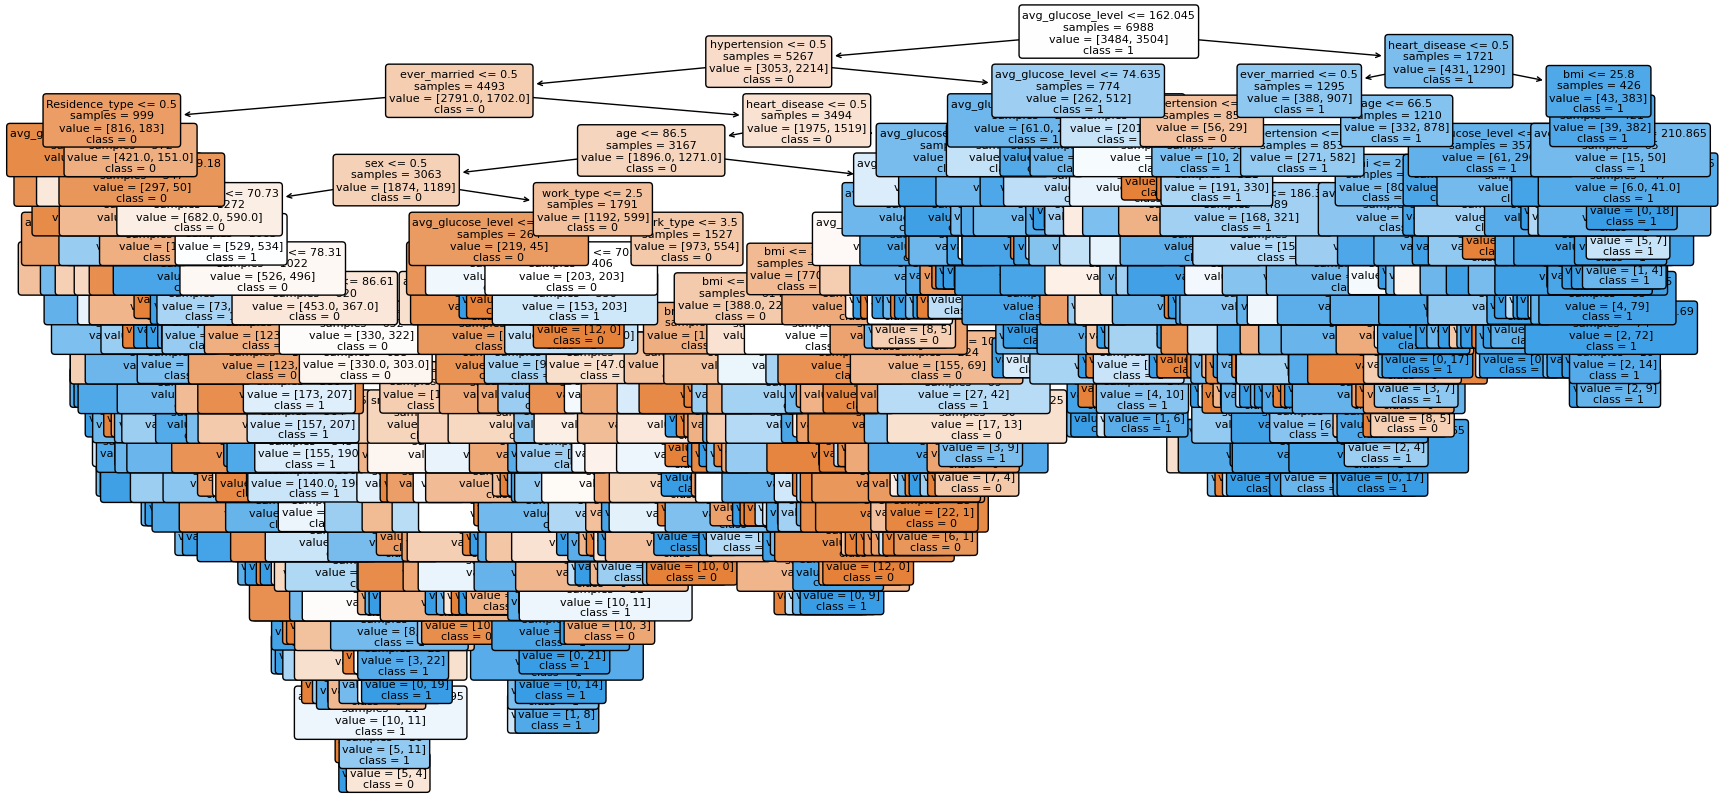

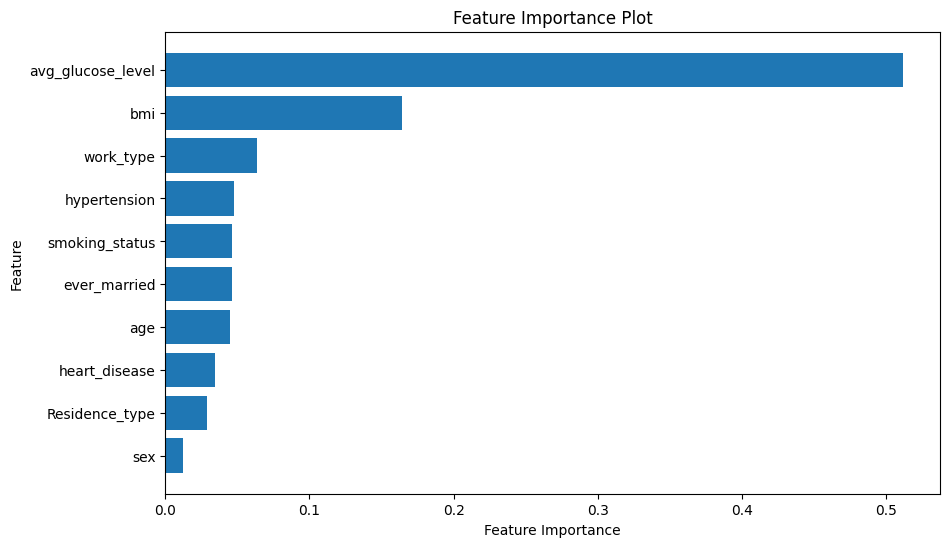

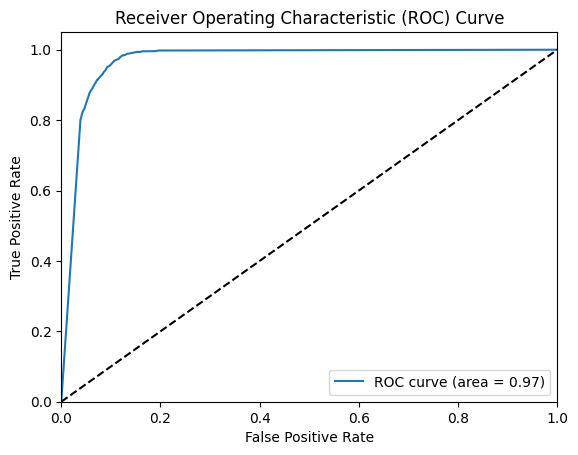

AUC Score: 0.9684604523713168


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8555078683834049, 0.9098712446351931, 0.8969957081545065, 0.9070100143061517, 0.9027181688125894, 0.882689556509299, 0.8569384835479256, 0.9141630901287554, 0.8839541547277937, 0.9068767908309455]
Mean accuracy: 0.8916725080036565
95% confidence interval: (0.8763885288346079, 0.906956487172705)


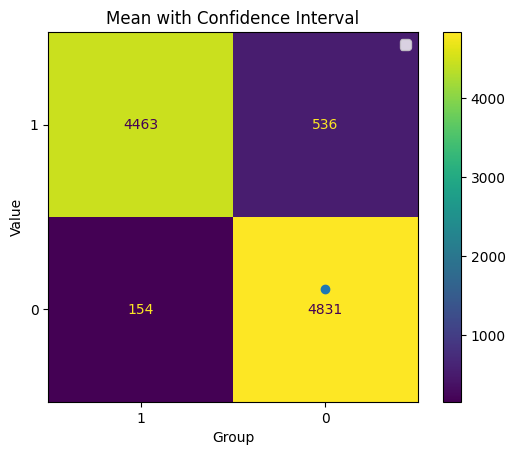

In [18]:
decision_tree = ML_algorithms.train_decision_tree_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_b)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 36.18374490737915
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.3, 'max_depth': 9, 'max_iter': 401, 'min_samples_leaf': 1}
Best score on training data:  0.9754566945180354
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3484
           1       1.00      1.00      1.00      3504

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1510
           1       0.95      0.98      0.97      1486

    accuracy                           0.97      2996
   macro avg       0.97      0.97      0.97      2996
weighted avg       0.97      0.97      0

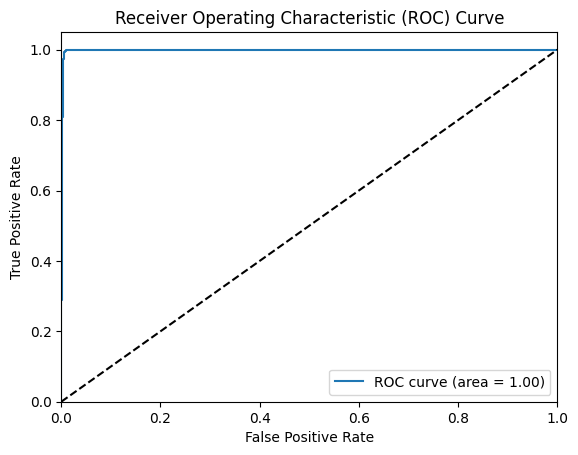

AUC Score: 0.9984595113606473


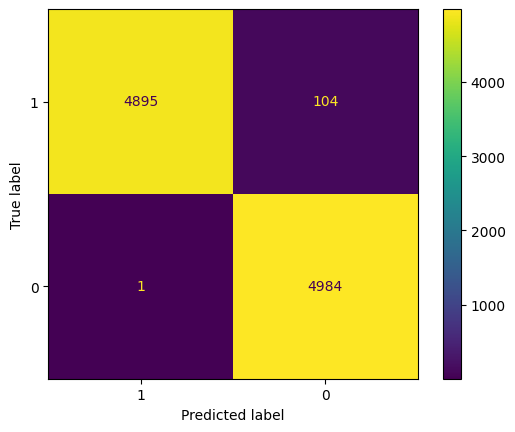

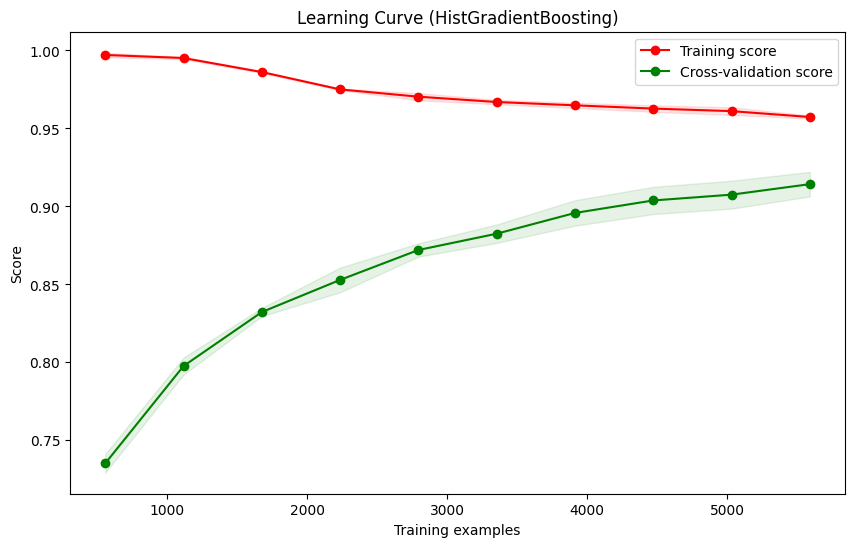

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9642346208869814, 0.9642346208869814, 0.9585121602288984, 0.9570815450643777, 0.9570815450643777, 0.9713876967095851, 0.949928469241774, 0.9699570815450643, 0.9670487106017192, 0.9570200573065902]
Mean accuracy: 0.9616486507536349
95% confidence interval: (0.9567807465467014, 0.9665165549605684)


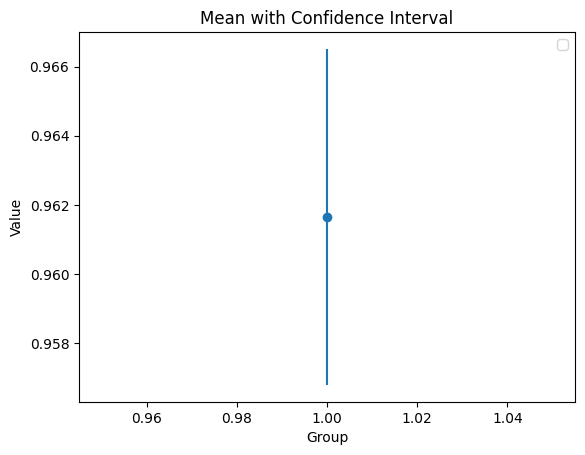

--------------------------------------


In [19]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_b)

print('--------------------------------------')

# Categorical

In [20]:
df = df_original.copy()

--------------------------------------
Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


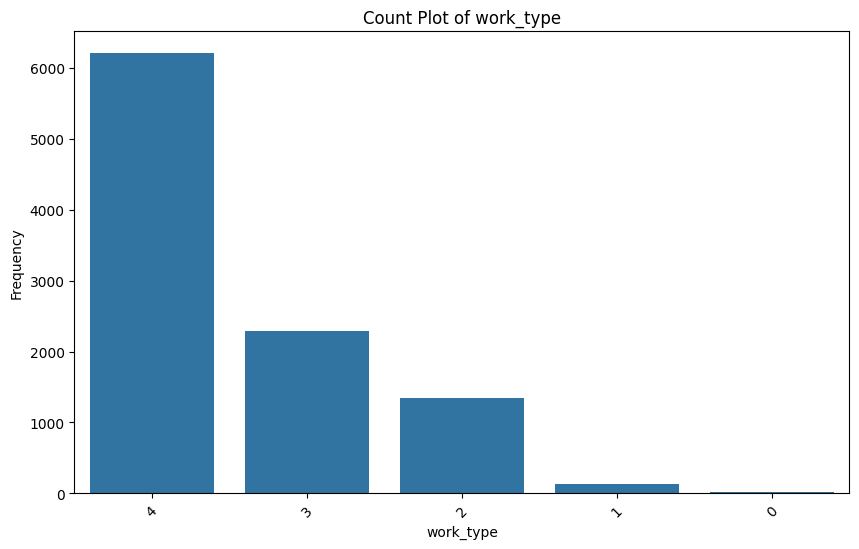

In [21]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [22]:
df_cat = outliers_utils.add_categorical_outliers('work_type', 30, df)

Valore meno frequente:  0


Value counts:
work_type
4    4372
0    3010
3    1548
2     962
1      92
Name: count, dtype: int64
Outliers detected: [4, 0, 3, 2, 1]
Outliers found:


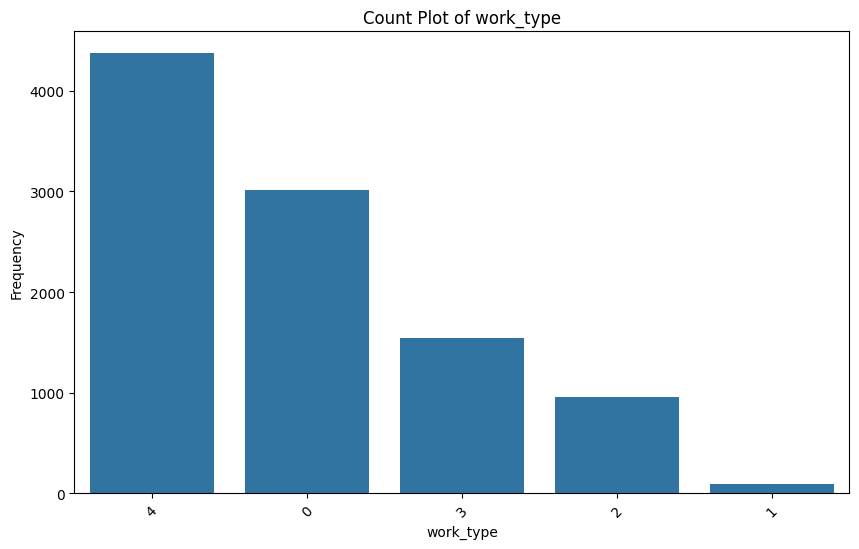

In [23]:
outliers_utils.visualize_outliers_categorical(df_cat, 'work_type')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3458
           1       0.97      0.98      0.98      3530

    accuracy                           0.97      6988
   macro avg       0.98      0.97      0.97      6988
weighted avg       0.98      0.97      0.97      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1541
           1       0.93      0.98      0.95      1455

    accuracy                           0.95      2996
   macro avg       0.95      0.95      0.95      2996
weighted avg       0.95      0.95      0.95      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4999
           1       0.95      0.99      0.97      4985

    accuracy                           0.97      9984


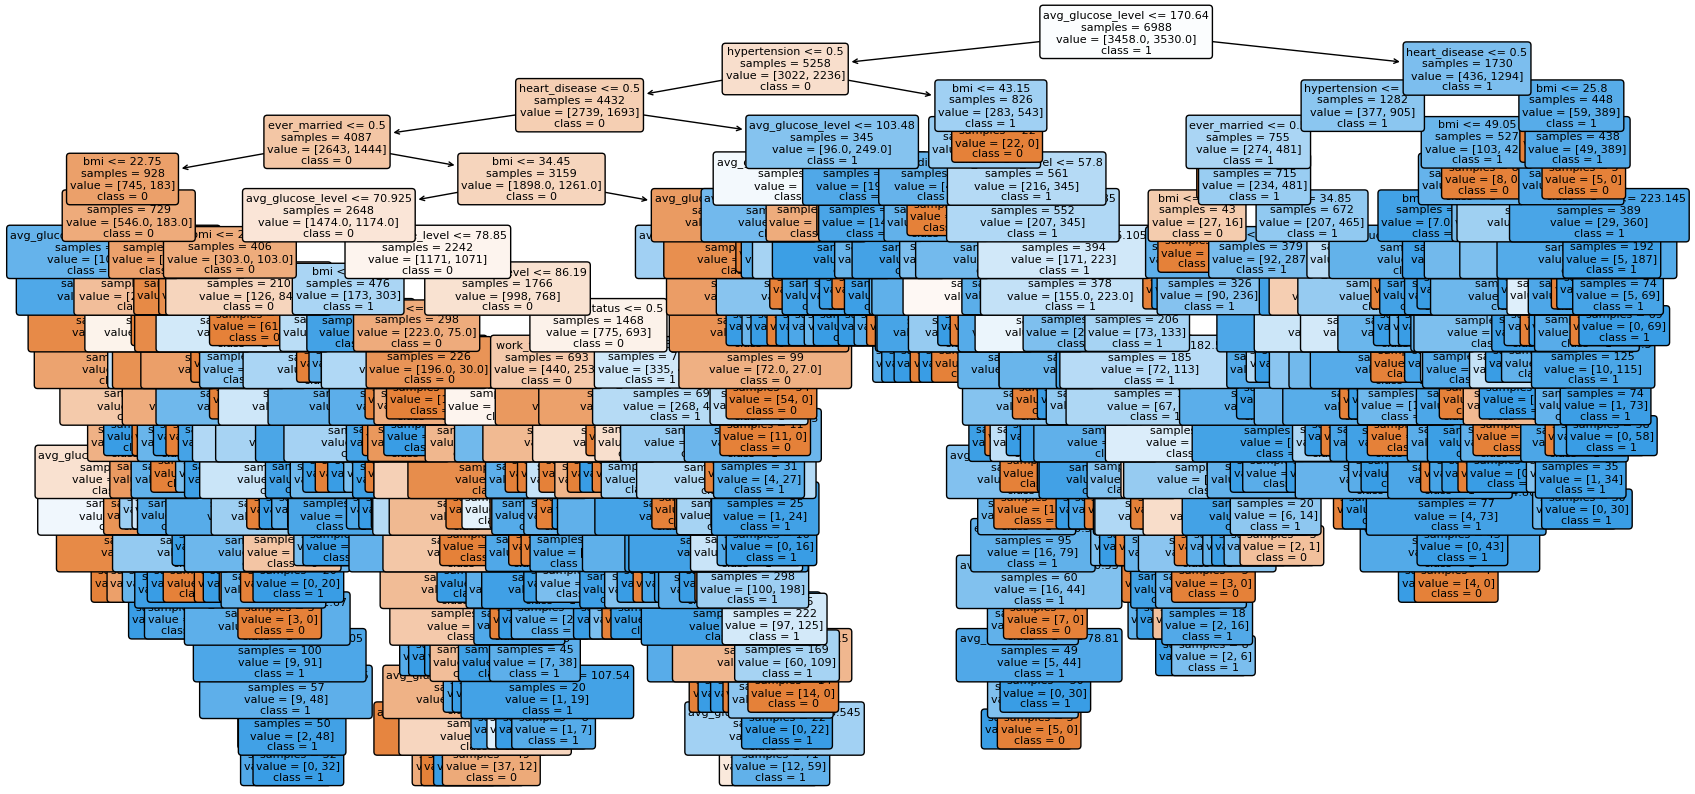

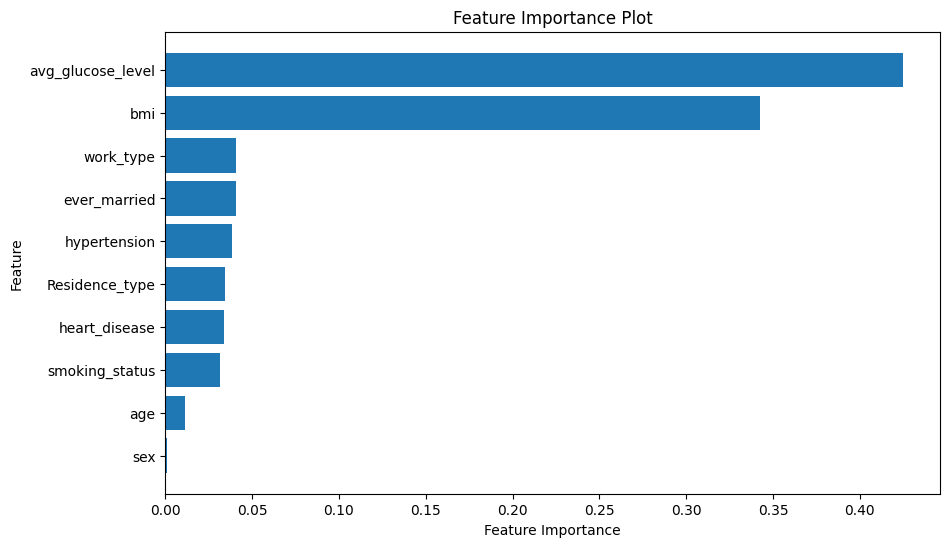

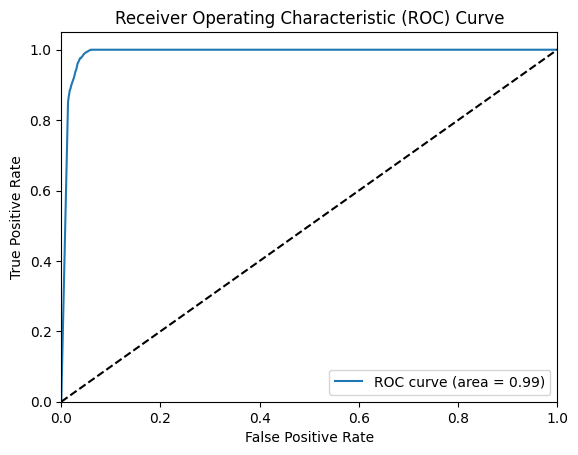

AUC Score: 0.9900833526785598


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9370529327610873, 0.9542203147353362, 0.9585121602288984, 0.9284692417739628, 0.9527896995708155, 0.9213161659513591, 0.9427753934191703, 0.9284692417739628, 0.9570200573065902, 0.9641833810888252]
Mean accuracy: 0.9444808588610007
95% confidence interval: (0.9337806944894883, 0.9551810232325132)


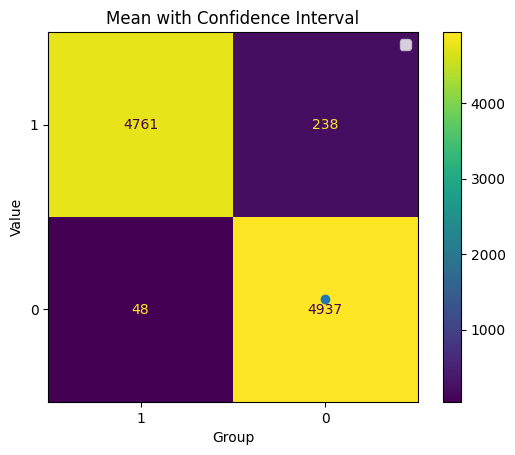

In [24]:
decision_tree = ML_algorithms.train_decision_tree_model(df_cat, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_cat)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 53.31866717338562
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.3, 'max_depth': 6, 'max_iter': 453, 'min_samples_leaf': 1}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3458
           1       1.00      1.00      1.00      3530

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1541
           1       0.99      1.00      1.00      1455

    accuracy                           1.00      2996
   macro avg       1.00      1.00      1.00      2996
weighted avg       1.00      1.00      1.00      2996



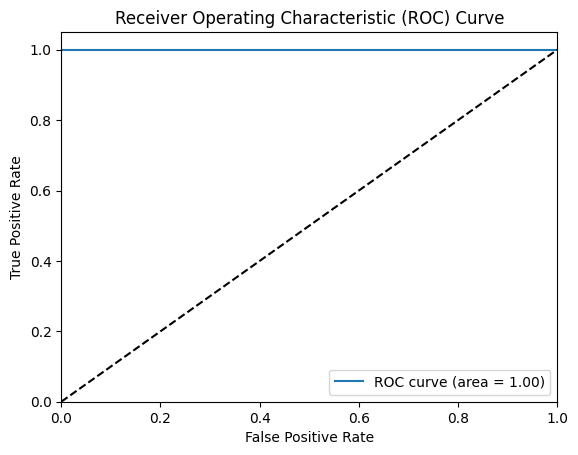

AUC Score: 0.9997699840870882


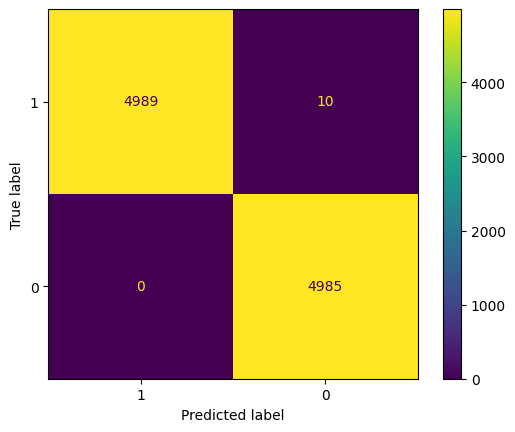

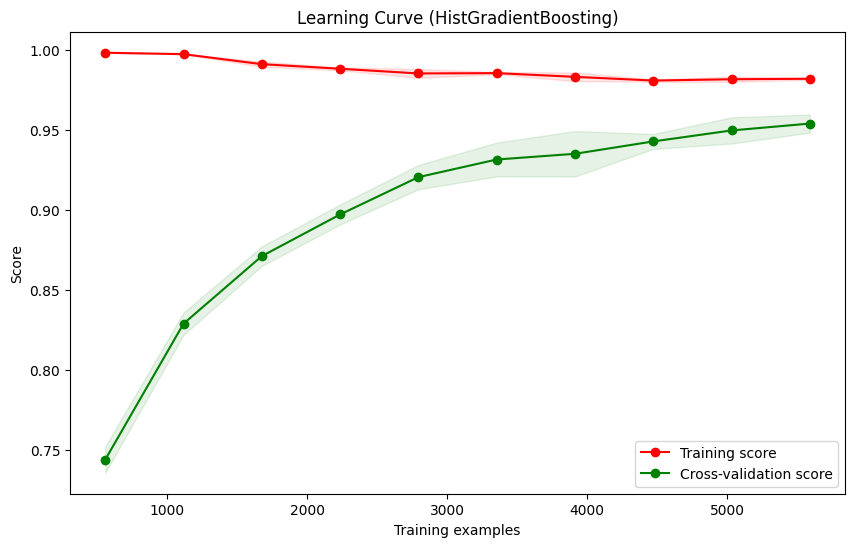

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9828326180257511, 0.9842632331902719, 0.9928469241773963, 0.9957081545064378, 0.9856938483547926, 0.9856938483547926, 0.994277539341917, 0.9856938483547926, 0.9914040114613181, 0.994269340974212]
Mean accuracy: 0.989268336674168
95% confidence interval: (0.9857821897885214, 0.9927544835598147)


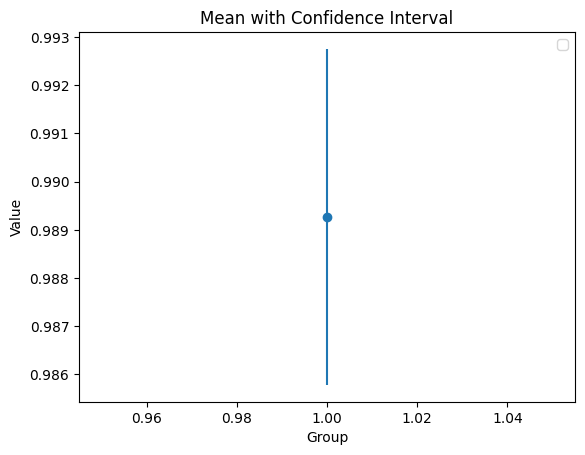

--------------------------------------


In [25]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_cat, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_cat)

print('--------------------------------------')